In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing Data

In [6]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#fill the missing values for numerical terms
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
# fill missing values for categorical terms
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

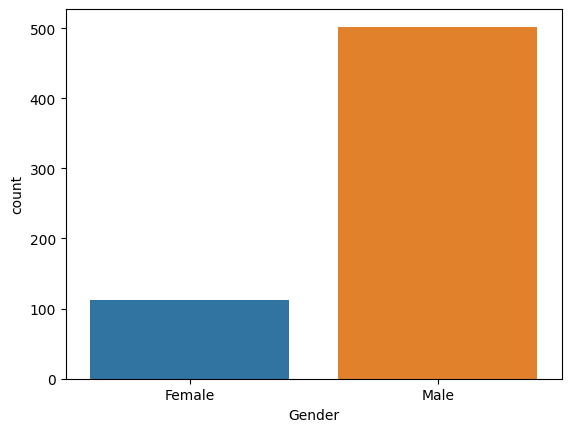

In [10]:
#categoricl attributes visulization
df['Gender'] = pd.Categorical(df['Gender'])
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Married', ylabel='count'>

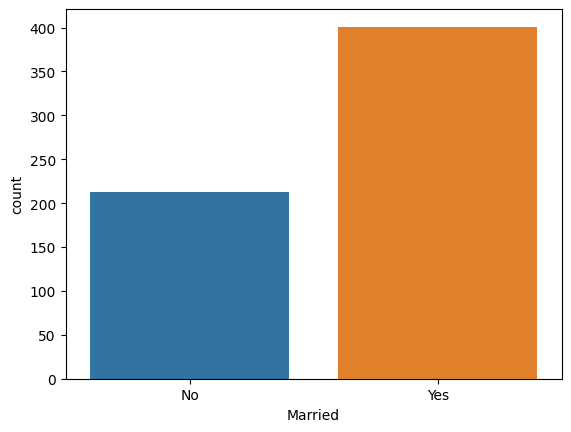

In [11]:
df['Married'] = pd.Categorical(df['Married'])
sns.countplot(x='Married', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

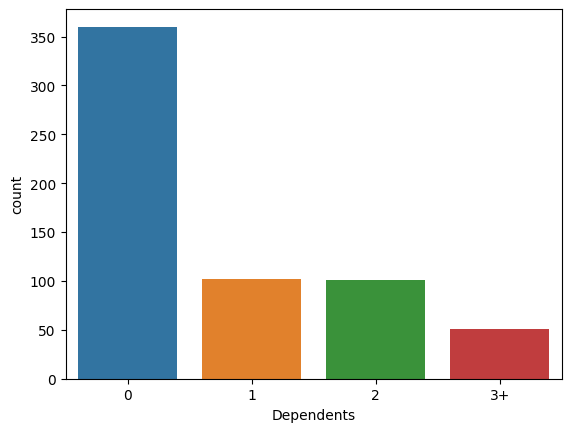

In [12]:
df['Dependents'] = pd.Categorical(df['Dependents'])
sns.countplot(x='Dependents', data=df)

<Axes: xlabel='Education', ylabel='count'>

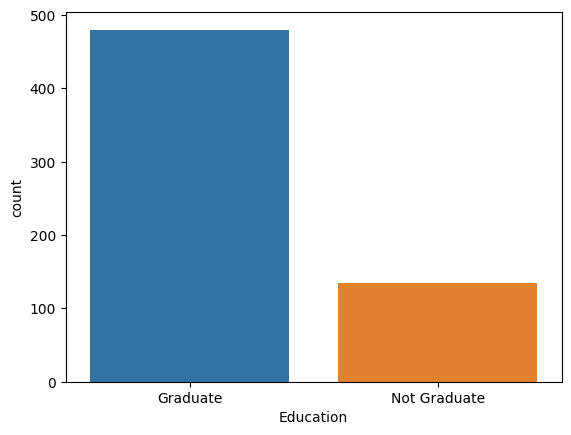

In [13]:
df['Education'] = pd.Categorical(df['Education'])
sns.countplot(x='Education', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

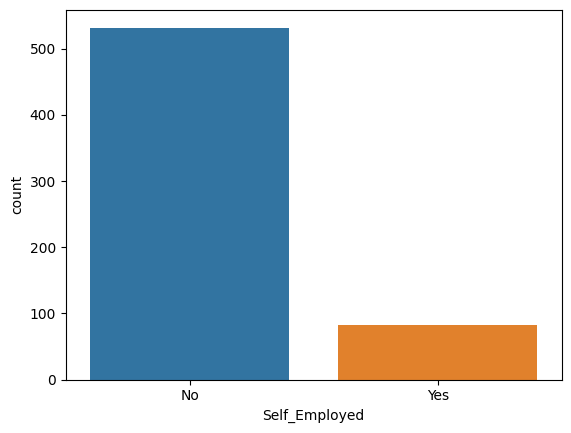

In [14]:
df['Self_Employed'] = pd.Categorical(df['Self_Employed'])
sns.countplot(x='Self_Employed', data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

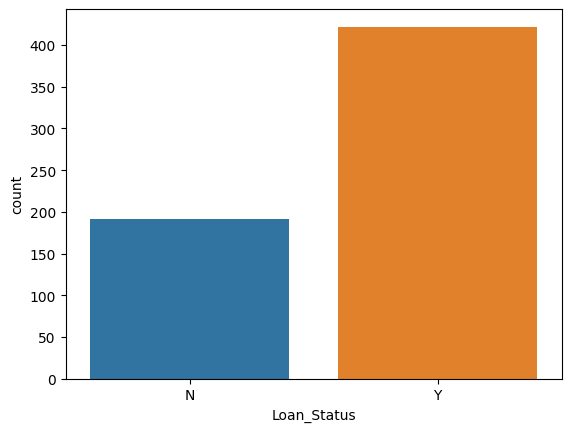

In [15]:
df['Loan_Status'] = pd.Categorical(df['Loan_Status'])
sns.countplot(x='Loan_Status', data=df)

In [16]:
## Creation of New Attributes
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11084\2079421182.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

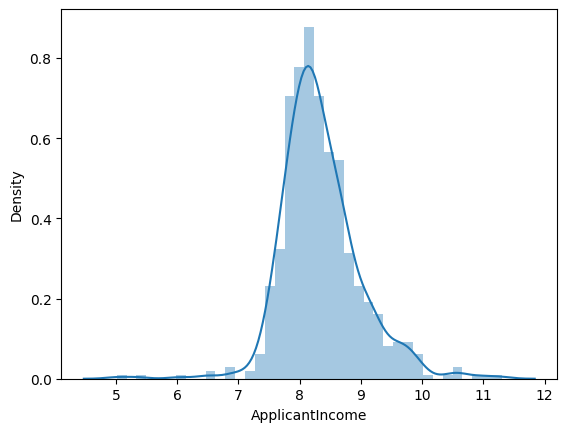

In [18]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])

In [19]:
# Remove NaN values from 'CoapplicantIncome' column
# CoapplicantIncome = df['CoapplicantIncome'].dropna()

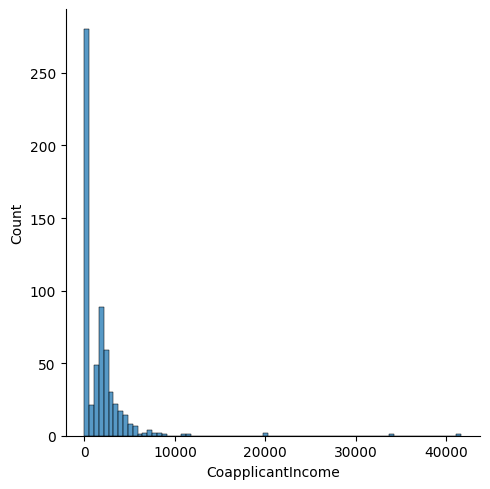

In [20]:
# Plot the distribution of 'CoapplicantIncome' using Seaborn
sns.displot(df['CoapplicantIncome'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11084\1997489442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

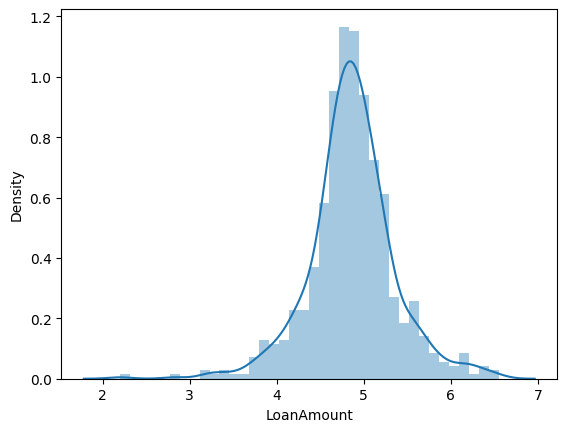

In [21]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11084\504774269.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

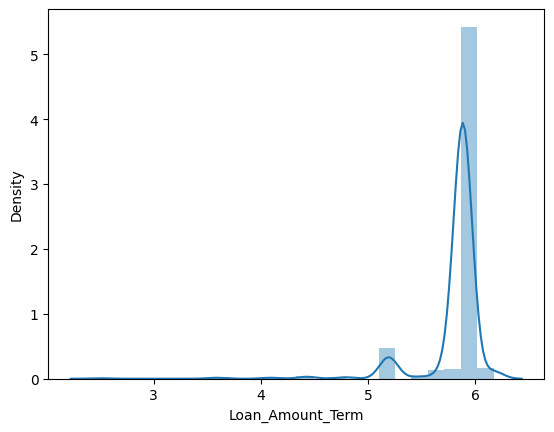

In [22]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11084\3021680648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncomeLog'])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

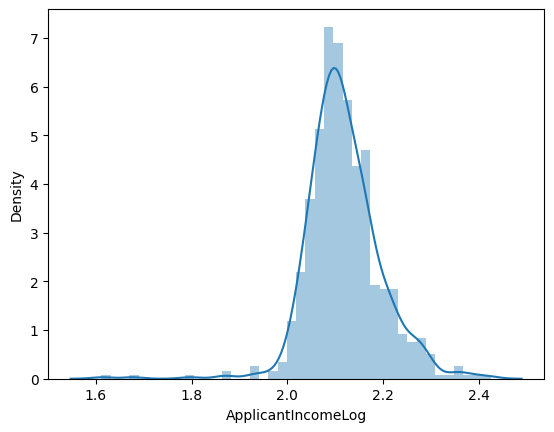

In [23]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


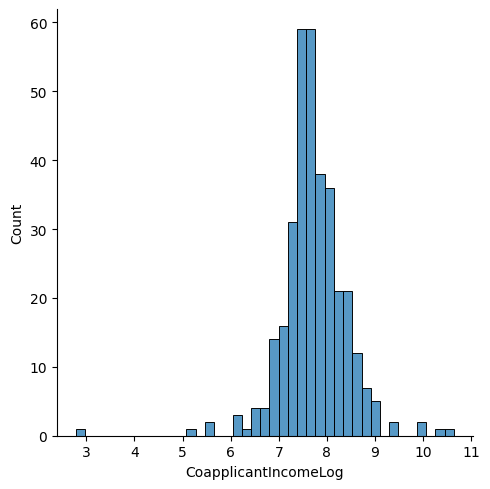

In [24]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.displot(df['CoapplicantIncomeLog'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11084\3068120744.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmountLog'])


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

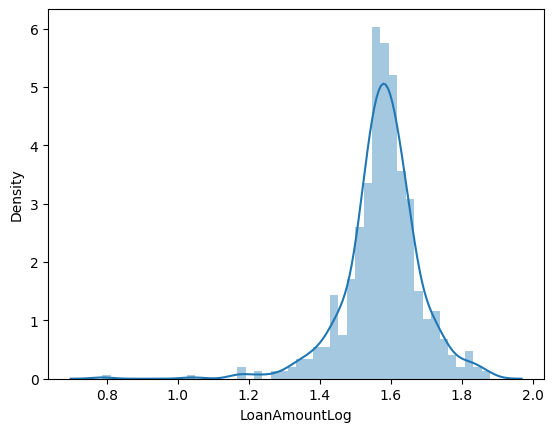

In [26]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

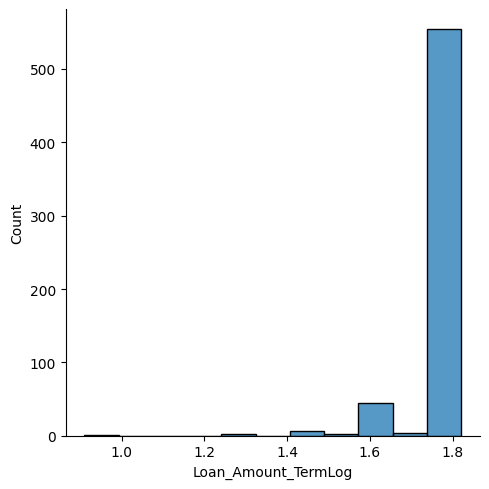

In [27]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_TermLog'])

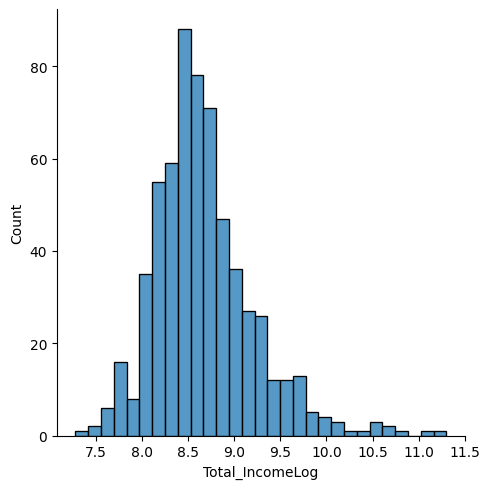

In [29]:
df['Total_IncomeLog'] = np.log(df['Total_Income'])
sns.displot(df['Total_IncomeLog'])

## Correlation Matrix

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11084\1585867877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

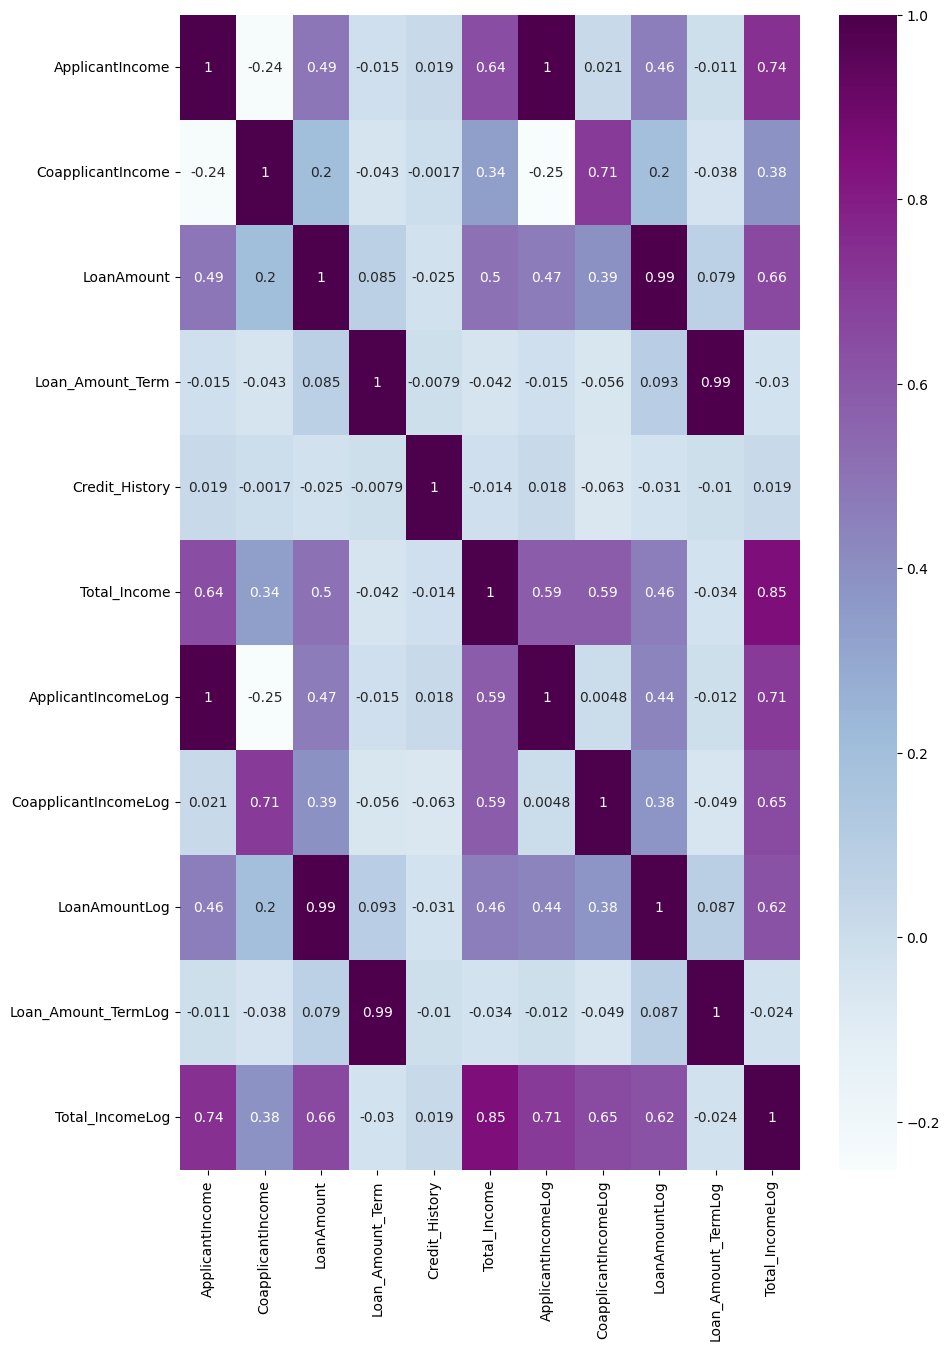

In [30]:
corr = df.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [32]:
# Drop unnecessary Coloumns
cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total_Income","Loan_ID","CoapplicantIncomeLog"]
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594,8.699515


## Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1,0,0,0,0,1.0,2,1,2.160333,1.606719,1.772594,8.674026
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,8.714568
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,1.772594,8.006368
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,1.772594,8.505323
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,8.699515


## Train-Test Split

In [78]:
Y = df.Loan_Status
Y = np.where(Y == 'Y', 1, 0)
X = pd.get_dummies(df.drop('Loan_Status',axis=1), drop_first = True)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Model Training

In [80]:
# Classify Function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy is ", model.score(x_test,y_test)*100)
    
    # Cross Validation - it is used for better validation of model
    
    score = cross_val_score(model, x, y, cv = 5)
    print("Cross validation is", np.mean(score)*100)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is  78.91891891891892
Cross validation is 81.10888977742236


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is  70.27027027027027
Cross validation is 71.49673463947754


In [84]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is  77.83783783783784
Cross validation is 78.82980141276823


In [85]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is  72.43243243243244
Cross validation is 75.73770491803279


## Hyper Parameter Tunning

In [89]:
model = RandomForestClassifier(n_estimators=320,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is  76.21621621621621
Cross validation is 80.12928162068506


## Confusion Matrix

In [90]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 32,  33],
       [  6, 114]], dtype=int64)

<Axes: >

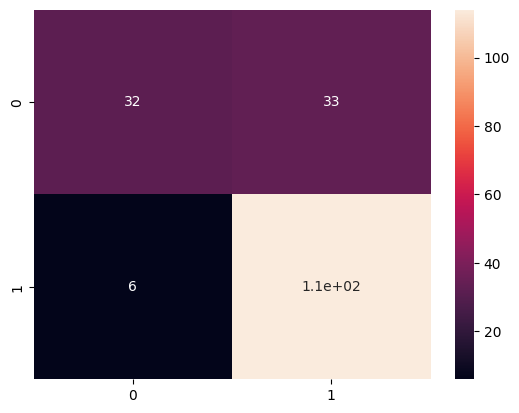

In [92]:
sns.heatmap(cm, annot = True)